In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


The data set shows the sales generated through the different adertising mediums such as TV,Radio and News Paper

In [3]:
#checking the sheape
df.shape

(200, 5)

The dataset has 200 rows and 5 columns

In [4]:
#checking the datatypes
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

The datase seems to be having all numerical values

In [5]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#checking the dataset for null values
df.isnull().sum()


Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

The data set seems to be having no null values

In [7]:
#checking the contents of columns
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

->The data set seems to be having majority of distinct values in their columns.

->The column unnamed:0 seems to be a index columns and hence can be droped .

In [8]:
#droping the coulumn unnamed:0
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:xlabel='sales', ylabel='Count'>

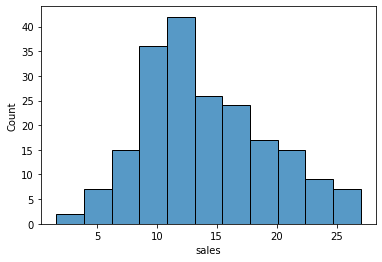

In [10]:
#plotting the target column
sns.histplot(df['sales'])



The histplot is showing that the target column might be having a skewness

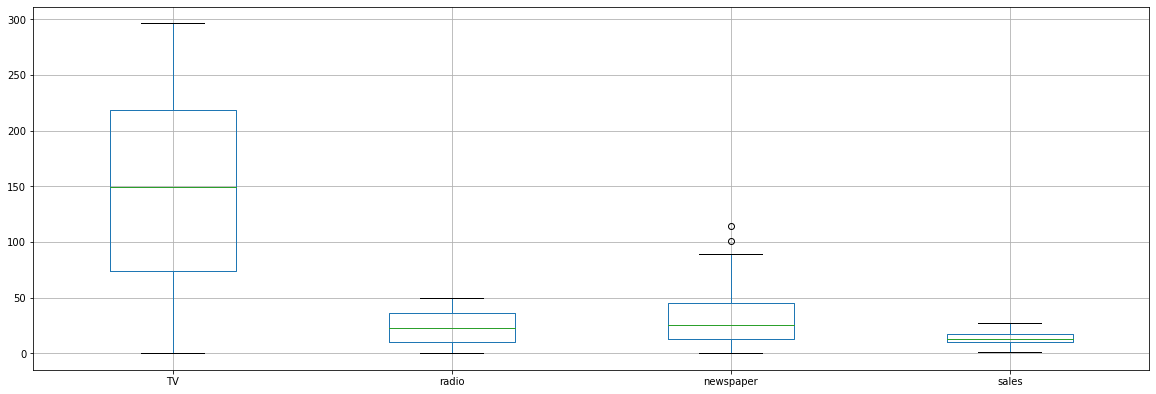

In [11]:
#checking for the outliers using boxplot
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)



The newspaper feature is showing the presence of outliers

<AxesSubplot:>

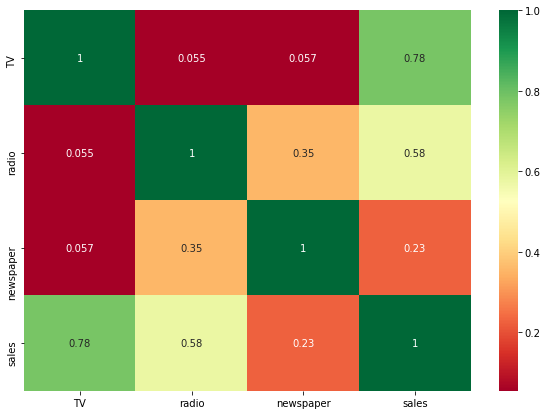

In [12]:
#checking the correlation
plt.figure(figsize=(10,7)) 
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

The heat map is showing the possitive correlation between the features and the target variables

In [13]:
corr=df.corr()
corr['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

The adverisements throug TV has the highest impact on sales, followed by radio and news paper

<AxesSubplot:xlabel='TV', ylabel='sales'>

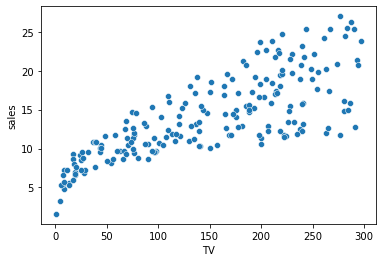

In [14]:
#poltting the relationship between the variables
sns.scatterplot(x='TV',y='sales',data=df)

The advertisements through Tv has a direct impact on the sales and the linear ralation is indiacted on the map

<AxesSubplot:xlabel='radio', ylabel='sales'>

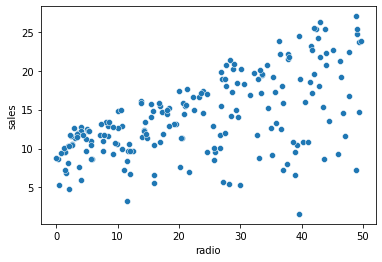

In [15]:
sns.scatterplot(x='radio',y='sales',data=df)

The linear relation between the advertisements through radio and the sales, the polt also indicates outliers 

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

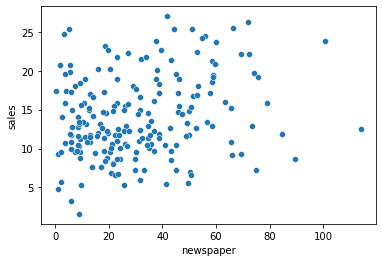

In [16]:
sns.scatterplot(x='newspaper',y='sales',data=df)

The relation between newspaper feature and sales, the data shows the presence of outliers 

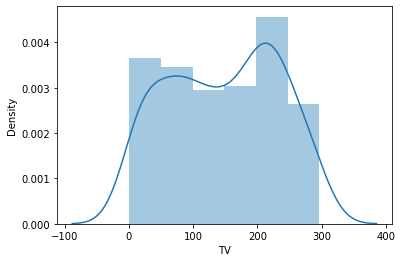

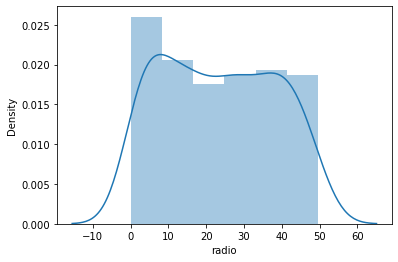

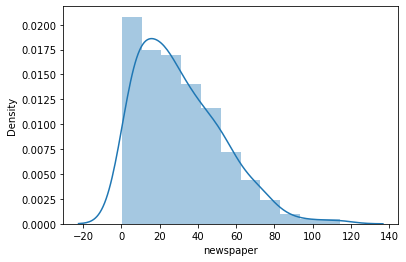

In [17]:
#checking the distribution of the features
cols=['TV','radio','newspaper']
for i in cols:
    plt.subplots()
    sns.distplot(df[i])

The features newspaper has a right skewness

In [18]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [19]:
#removing the outliers
from scipy.stats import zscore
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [20]:
df_new= df[(zscr<3).all(axis=1)]
df_new.shape

(198, 4)

2 rows where removed from the dataset

In [21]:
#checking the skewness again
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [22]:
#handling the skewness in the newspaper column
df['newspaper']=np.sqrt(df['newspaper'])

In [23]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

In [24]:
x=df.iloc[:,0:3]
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [25]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
#checking the best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
     rs=r2_score(y_test,predlr)
    if rs>maxacc:
        maxacc=rs
        maxrs=i
print('best accuracy',maxacc,'on random state',maxrs)

best accuracy 0.9398730445155545 on random state 154


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .22, random_state = 154)

In [29]:
x_train.shape

(156, 3)

In [30]:
y_train.shape

(156,)

In [31]:
x_test.shape

(44, 3)

In [32]:
y_test.shape

(44,)

In [33]:
def model(mod):
    mod.fit(x_test,y_test)
    ##print(mod.coef_)
    pred=mod.predict(x_test)
    mod.score(x_train,y_train)
    print('\n\n')
    ##print('predicted', pred)
    ##print('actual:',y_test)
    rscr=r2_score(y_test,pred)
    print('r2score:',r2_score(y_test,pred))
    print('Mean squared error',mean_squared_error(y_test,pred))
    print('mean absolute error:',mean_absolute_error(y_test,pred))

In [34]:
#function for cross-validation
from sklearn.model_selection import cross_val_score
def crossval(mod):
    scores = cross_val_score(mod, x_train, y_train, scoring='r2',cv=5)
    print('mean_cross_validation:',scores.mean())

In [35]:

model(LinearRegression())
crossval(LinearRegression())




r2score: 0.9367960310059871
Mean squared error 2.0231574151644445
mean absolute error: 1.066003973431849
mean_cross_validation: 0.8720280970798177


In [36]:
model(Lasso(alpha=0.01))
crossval(Lasso(alpha=0.01))




r2score: 0.9367952012546735
Mean squared error 2.023183975482562
mean absolute error: 1.066186721741318
mean_cross_validation: 0.8721072363812887


In [37]:
k=['linear','poly','rbf']
for i in k:
    print('\n')
    print('SVR kernel:',i)
    print('\n')
    svr=SVR(kernel=i)
    model(svr)
    crossval(svr)



SVR kernel: linear





r2score: 0.9355280107127758
Mean squared error 2.0637467120016795
mean absolute error: 1.0556011511537522
mean_cross_validation: 0.8607113113934733


SVR kernel: poly





r2score: 0.8365937304091127
Mean squared error 5.23063046940106
mean absolute error: 1.8015049312650782
mean_cross_validation: 0.8337895037443908


SVR kernel: rbf





r2score: 0.6882399130453687
Mean squared error 9.979432331762613
mean absolute error: 2.3020869583906487
mean_cross_validation: 0.7635856746411426


In [38]:
model(RandomForestRegressor())

crossval(RandomForestRegressor())




r2score: 0.9909093633166702
Mean squared error 0.29099104545454485
mean absolute error: 0.39999999999999986
mean_cross_validation: 0.9696449292670092


In [42]:

model(KNeighborsRegressor())
crossval(KNeighborsRegressor())




r2score: 0.8832309983442338
Mean squared error 3.737772727272727
mean absolute error: 1.2613636363636365
mean_cross_validation: 0.9386363611656776


In [40]:
model(ElasticNet())
crossval(ElasticNet())




r2score: 0.9365618831734932
Mean squared error 2.030652481235366
mean absolute error: 1.0800584526625547
mean_cross_validation: 0.8731314847109356


Selecting Random forest regressor as the best fit model

### Hyper parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['mse', 'mae'], 'max_features':['auto', 'sqrt', 'log2']}
rfr = RandomForestRegressor()
gscv = GridSearchCV(rfr, parameters)
gscv.fit(x_train, y_train)

print(gscv.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [45]:
rfr = RandomForestRegressor(criterion = 'mae', max_features = 'auto')
rfr.fit(x_train, y_train)
rfr.score(x_train, y_train)
predr= rfr.predict(x_test)
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predr))
print('Mean squared error: ', mean_squared_error(y_test,predr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predr)))
print('\n')
print('R2 Score: ', r2_score(y_test,predr))

Errors:


Mean absolute error:  0.5503409090909089
Mean squared error:  0.4629489318181793
Root mean squared error:  0.6804035066180798


R2 Score:  0.9855373537851629


### Saving the model

In [47]:
import joblib
joblib.dump(rfr, 'Advertising.obj')

['Advertising.obj']

In [48]:
final = joblib.load('Advertising.obj')
final.predict(x_train)

array([ 7.451, 18.917,  7.28 ,  9.648,  9.547, 15.509, 21.761, 14.902,
        6.822, 12.895, 15.862, 16.847, 25.353, 20.87 , 14.401, 12.863,
       15.03 , 21.989, 14.567, 12.079,  3.549, 11.645,  9.061, 11.139,
        5.091, 12.11 , 13.241,  8.44 , 10.191, 14.703, 10.482, 10.434,
        8.989, 11.839, 13.365, 13.787, 12.983, 21.907, 20.836, 12.396,
       10.924, 20.613,  9.995, 21.073, 12.832, 18.629, 19.155,  8.741,
        6.801, 10.625, 11.868, 24.842, 19.932, 25.405, 22.143,  7.019,
       10.751, 17.403, 19.441, 12.875,  9.842,  8.876, 18.65 , 11.696,
       12.088, 11.863,  7.981, 15.664, 19.75 , 14.27 , 11.587, 10.537,
       12.038, 11.157, 18.713, 22.326, 11.453, 20.   ,  9.158, 14.418,
       19.754,  5.73 , 15.152, 15.526, 18.529, 13.101, 12.737,  9.639,
       14.283, 16.198, 20.702, 24.145, 21.624, 11.778, 24.008, 11.944,
       10.109, 13.283,  5.511, 11.202, 15.968,  7.52 , 16.86 , 10.908,
       25.743, 19.398, 22.465,  8.805, 12.148, 12.709,  5.67 , 17.753,
      